# WINE QUALITY ANALYSIS USING SUPERVISED LEARNING TECHNIQUES

## Data Workflow

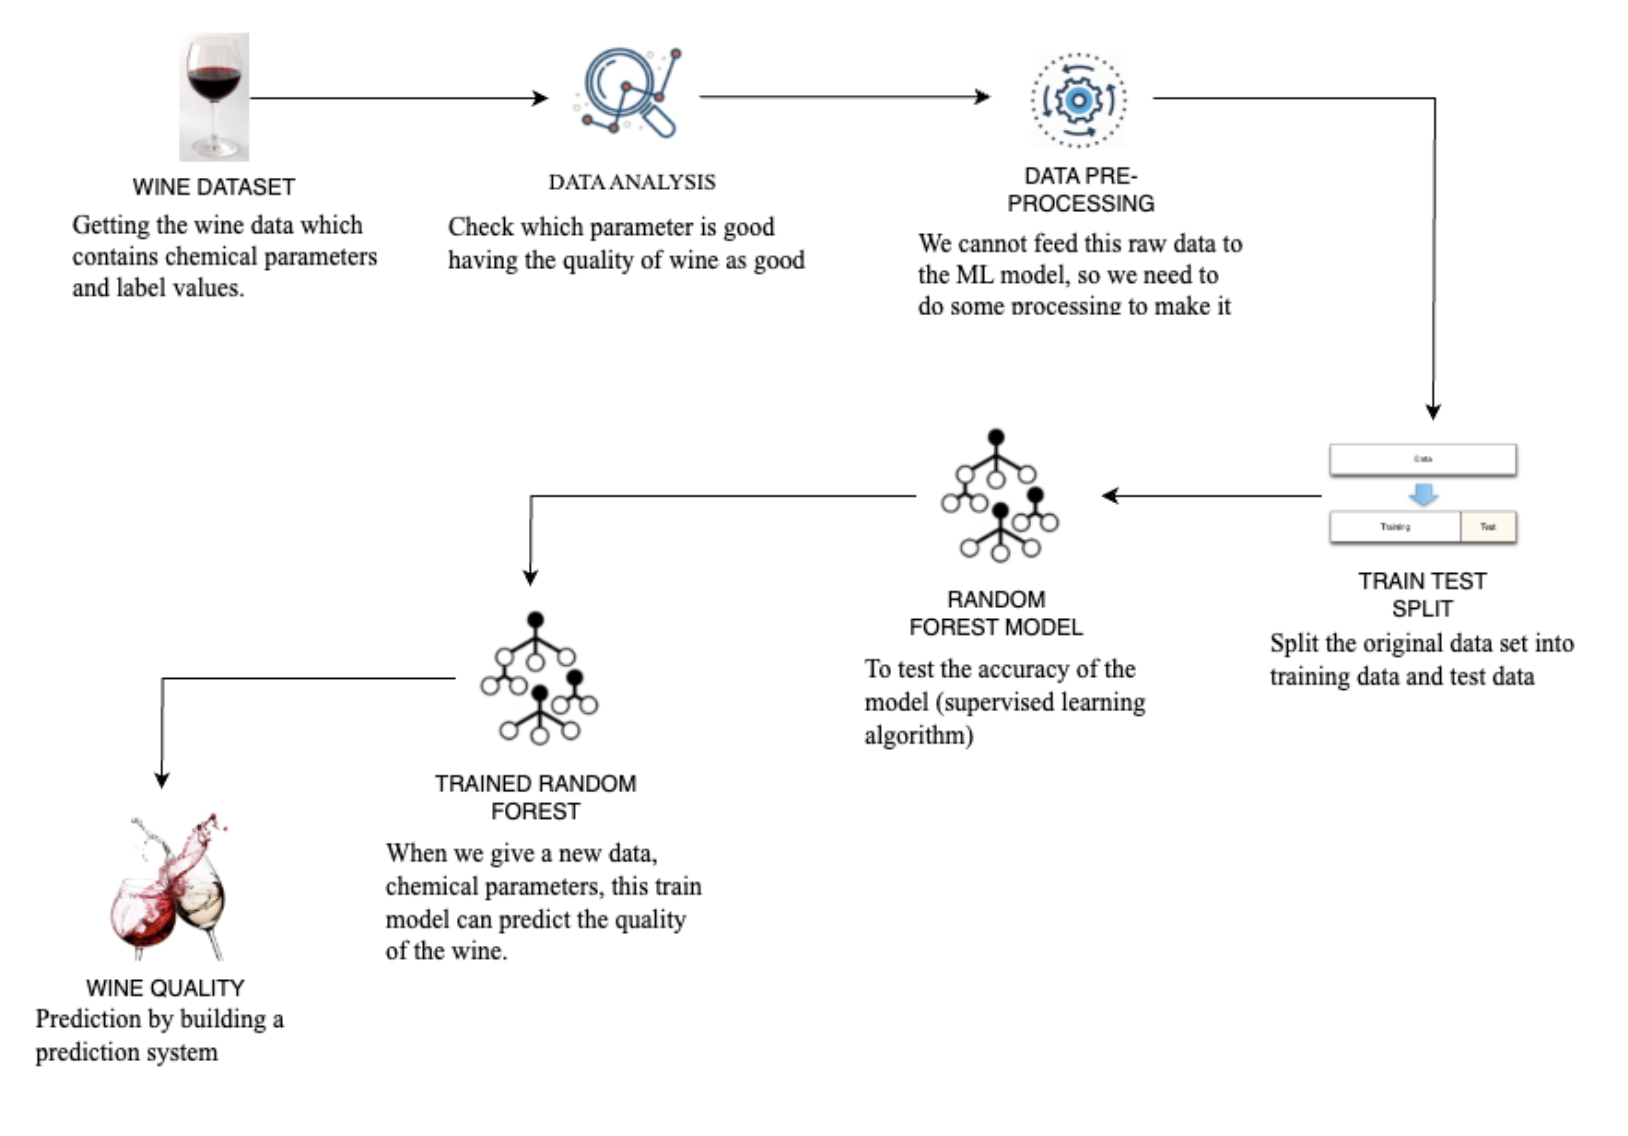

## Importing Libraries

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #to find how well our model is perofrming
import warnings
warnings.filterwarnings('ignore')
#!pip install xgboost

from sklearn.metrics import confusion_matrix


## Data Collection

In [183]:
#importing wine dataset to a Pandas Dataframe
wine_data=pd.read_csv('winequality.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


* This shows the dataset has 1599 different wines

In [184]:
#fetching first few rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [185]:
#check for missing (null) values in the dataset 
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* This implies there is no missing values in our dataset, because if we have any missing values in the dataset we cannot feed those missing values directly to the ML model.

## Data Analysis and Visualisation

In [186]:
#statistical measures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [187]:
#dataset info
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Figure size 200x200 with 0 Axes>

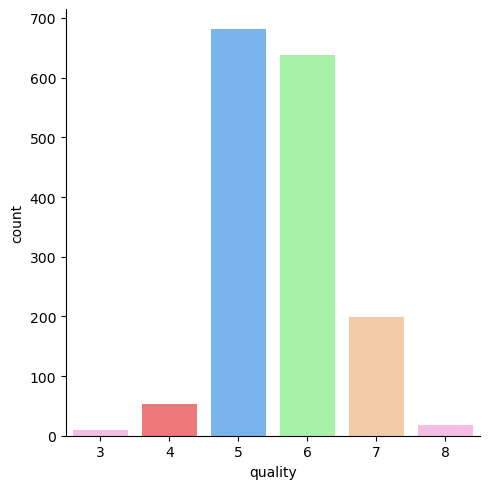

In [188]:
#number of values for each quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(2,2))
sns.catplot(x="quality",data=wine_data,kind="count",palette=pastel1_palette)

* This visualizes the distribution of wine quality ratings in your dataset. It shows how many wines fall into each quality rating category.This insight is crucial for addressing potential biases and improving model performance.

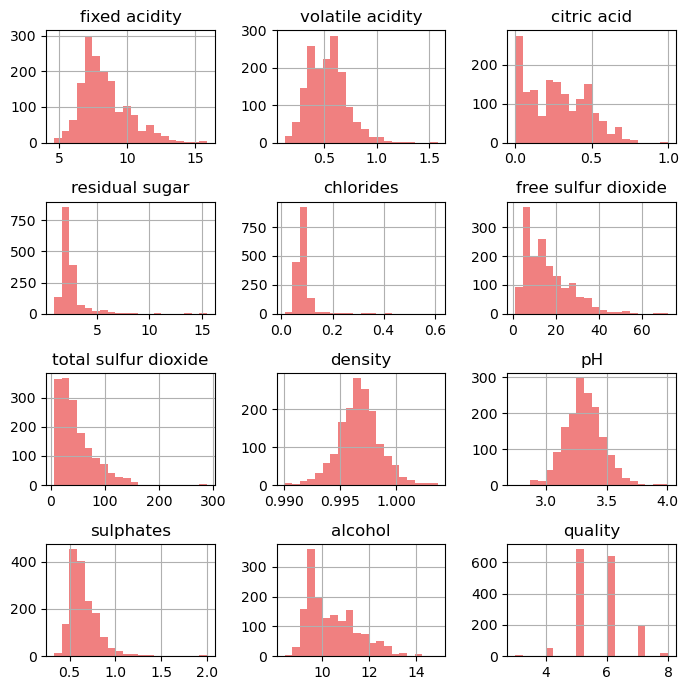

In [189]:
#visualising the distribution of the data with continuous values in the columns of the dataset.
wine_data.hist(bins=20, figsize=(7,7), color='lightcoral')
plt.tight_layout()
plt.show()

## Comaparing few parameters with quality

Text(0.5, 1.0, 'Fixed acidity vs Quality')

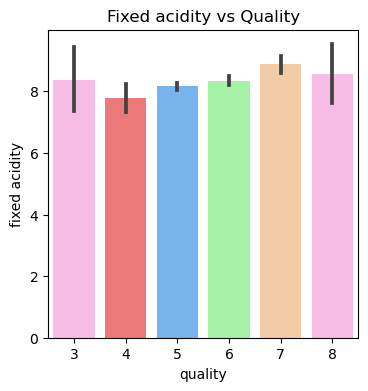

In [190]:
#fixed acidity vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='fixed acidity',data=wine_data,palette=pastel1_palette)
plt.title('Fixed acidity vs Quality')

Text(0.5, 1.0, 'Volatile acidity vs Quality')

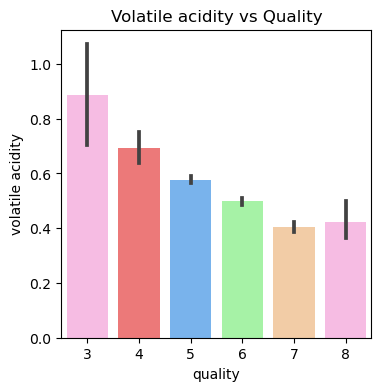

In [191]:
#Volatile acidity vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='volatile acidity',data=wine_data,palette=pastel1_palette)
plt.title('Volatile acidity vs Quality')

Text(0.5, 1.0, 'Citric acid vs Quality')

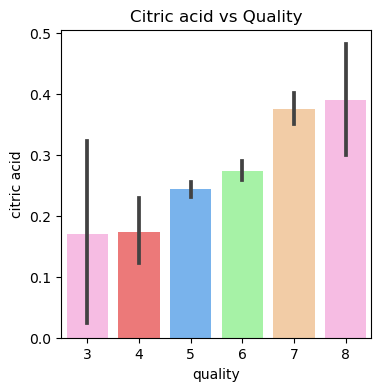

In [192]:
#citric acid vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='citric acid',data=wine_data,palette=pastel1_palette)
plt.title('Citric acid vs Quality')

Text(0.5, 1.0, 'Chlorides vs Quality')

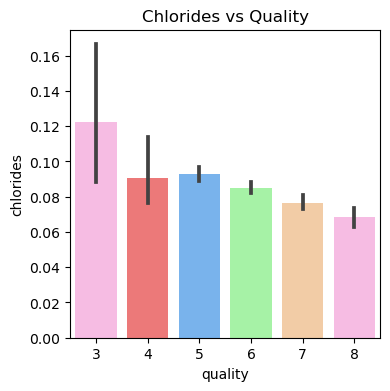

In [193]:
#chlorides vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='chlorides',data=wine_data,palette=pastel1_palette)
plt.title('Chlorides vs Quality')

Text(0.5, 1.0, 'Density vs Quality')

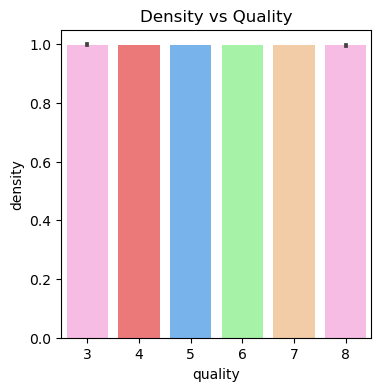

In [194]:
#density vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='density',data=wine_data,palette=pastel1_palette)
plt.title('Density vs Quality')

Text(0.5, 1.0, 'pH vs Quality')

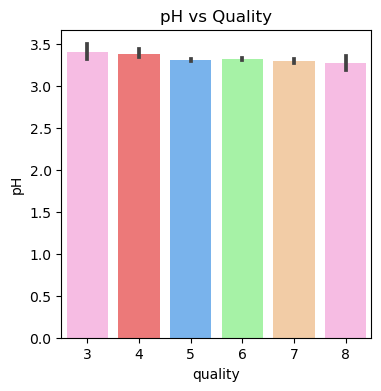

In [195]:
#pH (potential of hydrogen) vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='pH',data=wine_data,palette=pastel1_palette)
plt.title('pH vs Quality')

Text(0.5, 1.0, 'Alcohol vs Quality')

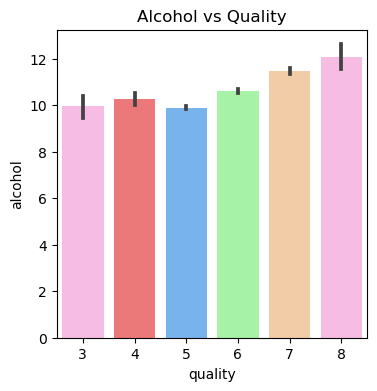

In [196]:
#alcohol vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='alcohol',data=wine_data,palette=pastel1_palette)
plt.title('Alcohol vs Quality')

Text(0.5, 1.0, 'Sulphates vs Quality')

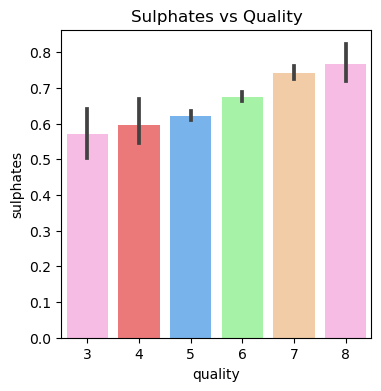

In [197]:
#sulphates vs quality
pastel1_palette = sns.color_palette(['#FFB3E6', '#FF6666', '#66B3FF', '#99FF99', '#FFCC99'])
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='sulphates',data=wine_data,palette=pastel1_palette)
plt.title('Sulphates vs Quality')

## Data Preprocessing

### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table represents the correlation between two variables.

###### Range: It ranges from -1 to 1.
* 1 indicates a perfect positive linear relationship.
* -1 indicates a perfect negative linear relationship.
* 0 indicates no linear relationship.


<Axes: >

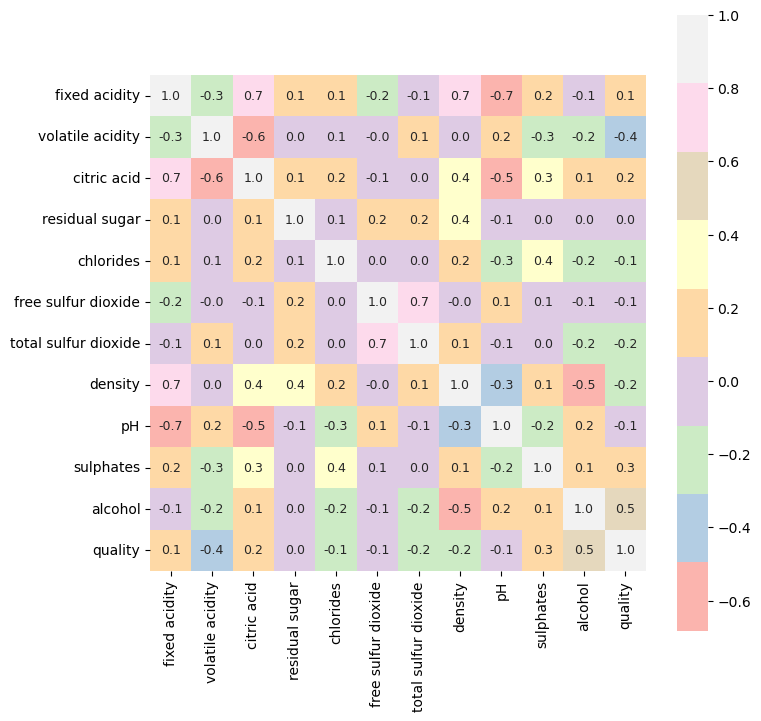

In [198]:
#Calculate correlation matrix
correlation=wine_data.corr()
#Constructing a HeatMap to understand correlation between columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Pastel1')

### Potential Relationships and Insights

###### Positive Correlation with Quality:
* Alcohol: Higher alcohol content tends to be associated with higher quality, as it can contribute to a more complex flavor profile.
* Sulphates: A moderate level of sulphates can help stabilize wine and prevent spoilage, which could positively impact quality.

###### Negative Correlation with Quality:
* Volatile acidity: Higher volatile acidity, often associated with a vinegar-like taste, can negatively impact quality.
* Chlorides: Excessive chlorides can contribute to a salty or metallic taste, potentially affecting quality.

###### Complex Relationships:
* Residual sugar: A moderate level of residual sugar can contribute to a wine's sweetness and balance, but excessive sweetness might negatively impact quality.

* Fixed acidity, Citric acid, pH, and Density: These parameters can influence the wine's overall balance and structure, but their relationship with quality might be more complex and dependent on other factors.

In [199]:
#separate the data and label(quality) in two variables
X=wine_data.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Label Binarization

In [200]:
wine_data['quality']=wine_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
Y=wine_data['quality']

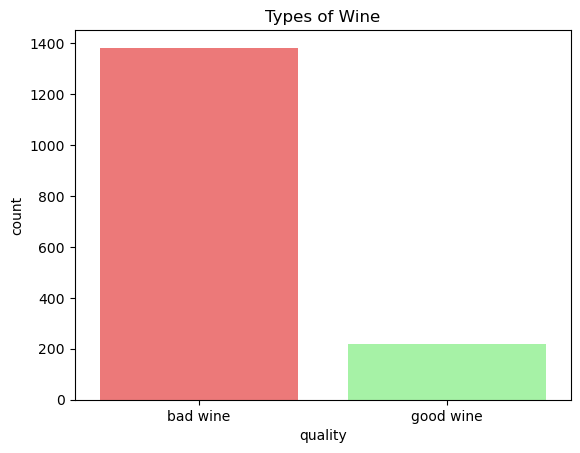

In [201]:
#plotting of separated wine quality
pastel1_palette = sns.color_palette(['#FF6666','#99FF99'])
sns.countplot(data = wine_data, x = 'quality',palette=pastel1_palette)
plt.xticks(ticks=[0, 1], labels=['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

## Train Test Split  
Splitting original data into training data and test data

In [202]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


## Model Training

In [203]:
from sklearn.linear_model import LogisticRegression
# Assume X_train, Y_train, X_test, Y_test are predefined
model = LogisticRegression()
model.fit(X_train, Y_train) 

# Predict the test set results
X_test_predictions = model.predict(X_test)

# Calculate the accuracy
test_data_accuracy = accuracy_score(Y_test, X_test_predictions)
print("Test Data Accuracy:", test_data_accuracy)

Test Data Accuracy: 0.896875


In [204]:
from sklearn.tree import DecisionTreeClassifier
# Assume X_train, Y_train, X_test, Y_test are predefined
model = DecisionTreeClassifier()
model.fit(X_train, Y_train) 

# Predict the test set results
X_test_predictions = model.predict(X_test)

# Calculate the accuracy
test_data_accuracy = accuracy_score(Y_test, X_test_predictions)
print("Test Data Accuracy:", test_data_accuracy)

Test Data Accuracy: 0.90625


In [205]:
from sklearn.ensemble import RandomForestClassifier
#create variable name as model to laod RandomModelClassifier model
model = RandomForestClassifier()
# Assume X_train, Y_train, X_test, Y_test are predefined
model.fit(X_train, Y_train) 

# Predict the test set results
X_test_predictions = model.predict(X_test)

# Calculate the accuracy
test_data_accuracy = accuracy_score(Y_test, X_test_predictions)
print("Test Data Accuracy:", test_data_accuracy)

Test Data Accuracy: 0.928125


In [206]:
from sklearn.ensemble import ExtraTreesClassifier
#create variable name as model to laod RandomModelClassifier model
model = ExtraTreesClassifier()
# Assume X_train, Y_train, X_test, Y_test are predefined
model.fit(X_train, Y_train) 

# Predict the test set results
X_test_predictions = model.predict(X_test)

# Calculate the accuracy
test_data_accuracy = accuracy_score(Y_test, X_test_predictions)
print("Test Data Accuracy:", test_data_accuracy)

Test Data Accuracy: 0.93125


## Building a Prediction System

In [207]:
input_data=(7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8)

#changing input data to NumPy Array
input_data_as_numpy=np.asarray(input_data)

#reshape the data as we are predicting the label for one instance
input_data_reshaped=input_data_as_numpy.reshape(1,-1)

#predicting the type of wine quality
prediction=model.predict(input_data_reshaped)
print(prediction)

#classification
if prediction[0]==1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine


## Confusion Matrix

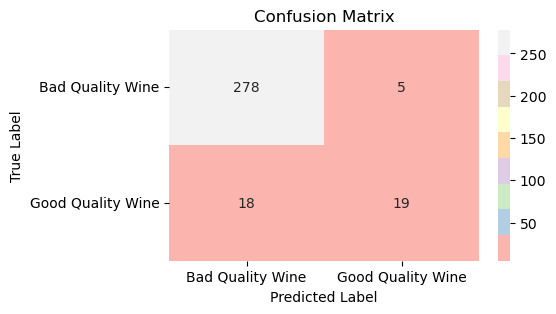

In [166]:
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', 
            xticklabels=['Bad Quality Wine', 'Good Quality Wine'],
            yticklabels=['Bad Quality Wine', 'Good Quality Wine'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
